In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')

Fraud check

In [ ]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


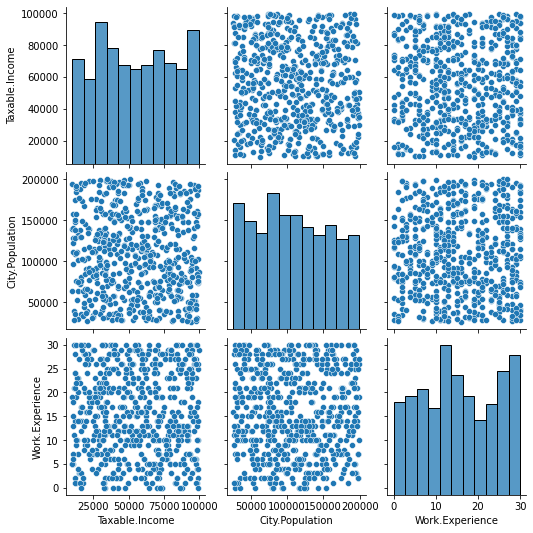

In [ ]:
sns.pairplot(data)

<AxesSubplot:>

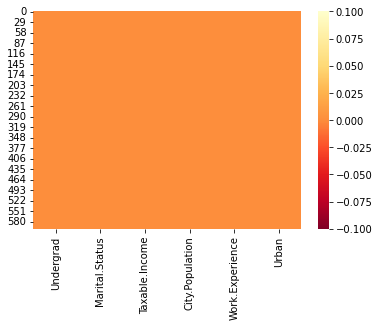

In [ ]:
sns.heatmap(data.isnull(),cmap='YlOrRd_r')

<AxesSubplot:>

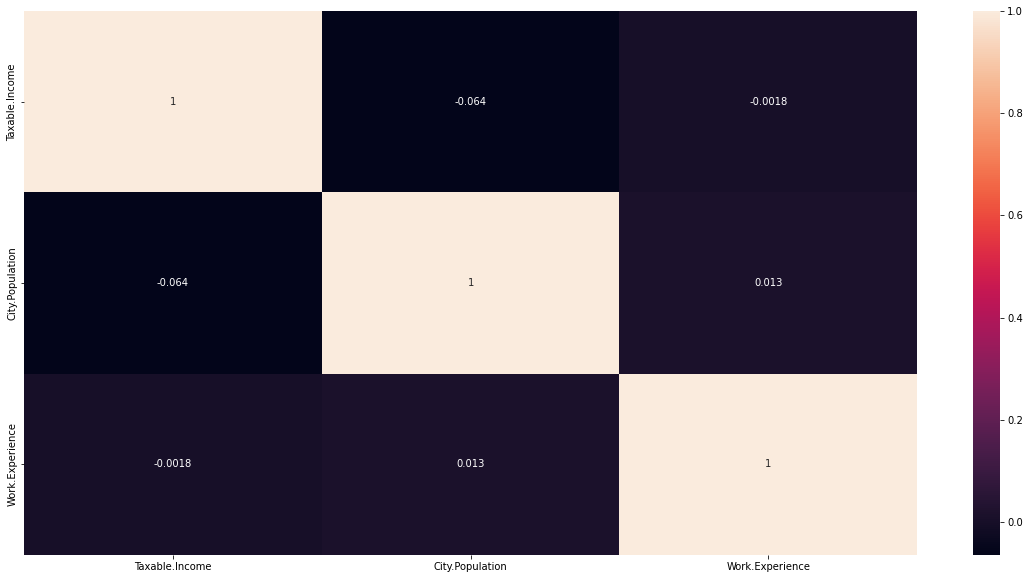

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [ ]:
data['Status'] = data['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [ ]:
data['Status']= label_encoder.fit_transform(data['Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [ ]:
data.Status.unique()

array([0, 1])

In [ ]:
x=data.iloc[:,0:4]
y=data['Status']

Bagged Decision Trees for Classification

In [ ]:
num_trees = 100
seed=8
kfold = KFold(n_splits=100, shuffle = True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

NameError: ignored

Stacking Ensemble for Classification

In [ ]:
kfold = KFold(n_splits=10,shuffle=True, random_state=8)
estimators = []
 # create the sub models
model1 = LogisticRegression(max_iter=100)                        
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)                           
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

Random Forest Classification

In [ ]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle= True ,random_state=8)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

AdaBoost Classification

In [ ]:
num_trees = 100
seed=8
kfold = KFold(n_splits=100, shuffle = True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

Company data 

In [ ]:
company=pd.read_csv("Company_Data.csv")
company.head(10)

In [ ]:
company.shape

In [ ]:
company.dtypes

In [ ]:
company.info()

In [ ]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)

In [ ]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')

In [ ]:
company['Urban']=company['Urban'].astype('category')

In [ ]:
company['US']=company['US'].astype('category')

In [ ]:
company.dtypes

In [ ]:
company.head(10)

In [ ]:
#label encoding to convert categorical values into numeric.
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.head(10)

In [ ]:
company.tail(10)

In [ ]:
# Visualization
sns.pairplot(company)

In [ ]:
sns.barplot(company['Sales'], company['Income'])

In [ ]:
sns.boxplot(company['Sales'], company['Income'])

In [ ]:
sns.lmplot(x='Income', y='Sales', data=company)

In [ ]:
sns.jointplot(company['Sales'], company['Income'])

In [ ]:
sns.stripplot(company['Sales'], company['Income'])

In [ ]:
sns.distplot(company['Sales'])

In [ ]:
sns.distplot(company['Income'])

In [ ]:
# setting feature and target variables
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
x = company.drop(['Sales', 'High'], axis = 1)
x = company[feature_cols]
y = company.High
x

In [ ]:
y

In [ ]:
 # Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train)

In [ ]:
print(y_train)

In [ ]:
print(x_test)

In [ ]:
print(y_test)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test

In [ ]:
x_train

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
classifier.fit(x_train, y_train)

In [ ]:
classifier.score(x_test, y_test)

In [ ]:
# # Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

In [ ]:
 # Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classifier.score(x_test, y_test)